In [95]:
import pandas as pd
import jinja2
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [96]:
# read the csv file
match_data_unfiltered = pd.read_csv("preprocessed_dataframe_with_elo_1.csv")

In [97]:
winning_team = match_data_unfiltered['FTR'].value_counts()
winning_team['H']/winning_team.sum()
# winning_team

0.4505718954248366

In [98]:
# make FTR column to continous variable
def convert_ftr(result: str):
    if result == "D":
        return 2
    elif result == "H":
        return 3
    elif result == "A":
        return 1
    else: 
        return None
match_data_unfiltered['FTR'] = match_data_unfiltered['FTR'].apply(convert_ftr)

In [99]:
match_data_unfiltered = match_data_unfiltered.drop(["Unnamed: 0"], axis=1, errors="ignore")
# print(match_data_unfiltered.columns)
match_data_unfiltered.tail(n=5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
4891,14.05.2022,Mainz,Ein Frankfurt,2.0,2.0,2,1.0,2.0,A,13.0,...,2.001489,-1.884149,1.172358,-1.581157,1.868412,-1.545160,0.652603,-1.330148,849.372072,844.265646
4892,14.05.2022,M'gladbach,Hoffenheim,5.0,1.0,3,3.0,1.0,H,19.0,...,3.347095,-1.133621,1.647127,-4.249006,2.048918,-1.426219,2.062127,-3.467829,877.665071,855.590835
4893,14.05.2022,Stuttgart,FC Koln,2.0,1.0,3,1.0,0.0,H,24.0,...,1.491069,-1.100222,1.535998,-1.369941,0.963734,-1.335884,1.877641,-0.890119,734.655957,762.003692
4894,14.05.2022,Union Berlin,Bochum,3.0,2.0,3,2.0,0.0,H,17.0,...,2.870488,-1.234870,1.944127,-2.321089,2.570349,-0.727307,1.757577,-1.887840,746.240131,389.650242
4895,14.05.2022,Wolfsburg,Bayern Munich,2.0,2.0,2,1.0,2.0,A,10.0,...,1.994849,-1.248584,2.255671,-1.869960,1.949939,-0.849493,2.258790,-1.790906,825.333792,1118.372385


In [100]:
# print correlation matrix
correlation_matrix_match_data_unfiltered = match_data_unfiltered.corr()
correlation_matrix_match_data_unfiltered.style.background_gradient()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HomeElo,AwayElo,HomeAttack,HomeDefend,AwayAttack,AwayDefend,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld,HomeEloOld,AwayEloOld
FTHG,1.000000,-0.115890,0.632818,0.691083,-0.066105,0.282759,-0.121474,0.529431,-0.122165,-0.110952,-0.079891,0.024723,-0.068897,-0.128651,0.020357,-0.084379,0.065876,0.192706,-0.072156,0.817656,0.132531,-0.124136,-0.762975,0.213256,0.093173,-0.086369,-0.087695,0.165829,-0.045695
FTAG,-0.115890,1.000000,-0.652825,-0.077238,0.681759,-0.110333,0.297404,-0.118181,0.534106,-0.010506,-0.051651,-0.042649,0.063109,0.091277,-0.060410,0.134629,-0.058063,-0.050974,0.172909,-0.124901,-0.766000,0.718631,0.130186,-0.090630,-0.066225,0.166395,0.083982,-0.028317,0.149910
FTR,0.632818,-0.652825,1.000000,0.425434,-0.439499,0.189774,-0.201513,0.354642,-0.369956,-0.043109,0.004917,-0.007333,-0.040962,-0.114128,0.059165,-0.138916,0.090794,0.136225,-0.151012,0.538052,0.531987,-0.492035,-0.504232,0.177938,0.103227,-0.147472,-0.094549,0.100912,-0.115695
HTHG,0.691083,-0.077238,0.425434,1.000000,-0.078063,0.126746,-0.059225,0.339639,-0.082490,-0.049028,-0.053229,-0.037902,-0.006581,-0.111528,0.013452,-0.029325,0.020904,0.128916,-0.044013,0.574226,0.094772,-0.077146,-0.517303,0.160720,0.070694,-0.050489,-0.046817,0.110656,-0.026045
HTAG,-0.066105,0.681759,-0.439499,-0.078063,1.000000,-0.017061,0.147804,-0.047770,0.331774,0.001003,-0.007671,0.032551,-0.000917,0.075908,-0.053471,0.064540,-0.000982,-0.027334,0.134705,-0.069947,-0.518497,0.500669,0.082534,-0.051828,-0.042754,0.128496,0.060822,-0.012263,0.119317
HS,0.282759,-0.110333,0.189774,0.126746,-0.017061,1.000000,-0.316971,0.664345,-0.199804,-0.120852,0.039524,0.508935,-0.254611,-0.121168,0.055733,-0.103701,0.095520,0.063736,-0.189992,0.298766,0.126035,-0.175945,-0.254642,0.191916,0.108350,-0.166592,-0.102839,0.060782,-0.186790
AS,-0.121474,0.297404,-0.201513,-0.059225,0.147804,-0.316971,1.000000,-0.199331,0.676266,0.064472,-0.076242,-0.244556,0.486411,0.108685,-0.061900,0.097864,-0.082758,-0.122667,0.106571,-0.164239,-0.277561,0.290737,0.141888,-0.155844,-0.127416,0.170413,0.104533,-0.119019,0.102988
HST,0.529431,-0.118181,0.354642,0.339639,-0.047770,0.664345,-0.199331,1.000000,-0.087377,-0.052120,0.032089,0.311088,-0.159436,-0.116918,0.036144,-0.086779,0.089747,0.016793,-0.235931,0.479845,0.142784,-0.164671,-0.414579,0.199530,0.120579,-0.145003,-0.074459,0.005244,-0.223937
AST,-0.122165,0.534106,-0.369956,-0.082490,0.331774,-0.199804,0.676266,-0.087377,1.000000,0.064358,-0.023169,-0.145561,0.322492,0.098727,-0.067452,0.092219,-0.059565,-0.153934,0.055267,-0.141689,-0.434150,0.417998,0.150607,-0.117306,-0.087985,0.143030,0.112253,-0.142614,0.044177
HF,-0.110952,-0.010506,-0.043109,-0.049028,0.001003,-0.120852,0.064472,-0.052120,0.064358,1.000000,0.350923,-0.083828,0.012621,0.322449,0.097079,0.076233,0.059689,-0.444572,-0.368586,-0.183680,-0.037472,-0.030441,0.070650,-0.184827,-0.065741,-0.027497,0.009197,-0.442968,-0.367831


In [101]:
# filter for specific columns
# match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeElo", "AwayElo", "HomeAttack", "HomeDefend", "AwayAttack", "AwayDefend"]]
# "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    # "AwayAttackOld", "AwayDefendOld"
# print correlation matrix
match_data_reduced = match_data_unfiltered.loc[:, ["FTR", "FTHG", "FTAG", "HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld", "AwayAttackOld", "AwayDefendOld"]]

correlation_matrix_match_data_reduced = match_data_reduced.corr()
correlation_matrix_match_data_reduced.style.background_gradient()

,FTR,FTHG,FTAG,HomeEloOld,AwayEloOld,HomeAttackOld,HomeDefendOld,AwayAttackOld,AwayDefendOld
FTR,1.000000,0.632818,-0.652825,0.100912,-0.115695,0.177938,0.103227,-0.147472,-0.094549
FTHG,0.632818,1.000000,-0.115890,0.165829,-0.045695,0.213256,0.093173,-0.086369,-0.087695
FTAG,-0.652825,-0.115890,1.000000,-0.028317,0.149910,-0.090630,-0.066225,0.166395,0.083982
HomeEloOld,0.100912,0.165829,-0.028317,1.000000,0.668072,0.317477,0.077238,0.042324,-0.058508
AwayEloOld,-0.115695,-0.045695,0.149910,0.668072,1.000000,0.051041,-0.056731,0.315563,0.088859
HomeAttackOld,0.177938,0.213256,-0.090630,0.317477,0.051041,1.000000,0.196511,0.013204,0.006045
HomeDefendOld,0.103227,0.093173,-0.066225,0.077238,-0.056731,0.196511,1.000000,-0.013643,0.019664
AwayAttackOld,-0.147472,-0.086369,0.166395,0.042324,0.315563,0.013204,-0.013643,1.000000,0.188030
AwayDefendOld,-0.094549,-0.087695,0.083982,-0.058508,0.088859,0.006045,0.019664,0.188030,1.000000


In [102]:
X = match_data_unfiltered.loc[:, ["HomeEloOld", "AwayEloOld", "HomeAttackOld", "HomeDefendOld",
    "AwayAttackOld", "AwayDefendOld"
]]

y = match_data_unfiltered.loc[:, ["FTHG", "FTAG"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train, y_train = X, y

In [103]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [104]:
# clf.predict(X_test)

In [105]:
result = clf.score(X_test, y_test)

ValueError: multiclass-multioutput is not supported

In [ ]:
result

0.38613861386138615

Confusion matrix, without normalization
[[154 146 199]
 [119 113 174]
 [181 173 357]]
Normalized confusion matrix
[[0.30861723 0.29258517 0.3987976 ]
 [0.29310345 0.27832512 0.42857143]
 [0.25457103 0.24331927 0.5021097 ]]


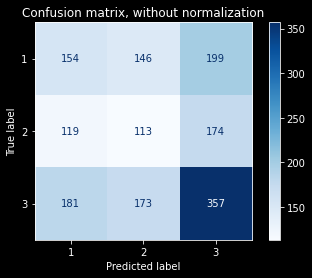

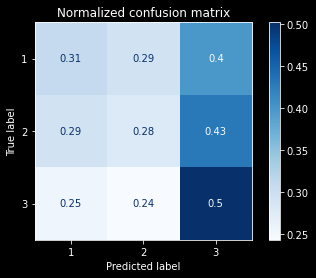

In [ ]:
class_names = {
    'Away'
    ,'Draw',
    'Home'
}
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [107]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import backend, callbacks
#create model
model = Sequential()

#get number of columns in training data
n_cols_2 = X_train.shape[1]
print(n_cols_2)

#add layers to model
model.add(Dense(10, activation='relu', input_shape=(n_cols_2, )))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
# model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'mse'], metrics=['accuracy'])
model.compile(metrics=['accuracy'], optimizer='rmsprop', 
              loss='categorical_crossentropy')
# K.set_value(model.optimizer.learning_rate, 0.01)

# early_stopping_monitor = EarlyStopping(patience=3)

es = callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) 


history = model.fit(X_train, y_train, callbacks=[es], epochs=1000, batch_size = 500, validation_split=0.3) #, callbacks=[early_stopping_monitor])

6
Epoch 1/1000
5/5 [==============================] - 1s 35ms/step - loss: 88.9332 - accuracy: 0.6995 - val_loss: 84.0476 - val_accuracy: 0.6799
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 82.2303 - accuracy: 0.6986 - val_loss: 79.3416 - val_accuracy: 0.6860
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 77.6983 - accuracy: 0.7003 - val_loss: 73.8620 - val_accuracy: 0.6778
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 71.6900 - accuracy: 0.7008 - val_loss: 67.3105 - val_accuracy: 0.6799
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 65.1020 - accuracy: 0.6982 - val_loss: 59.3367 - val_accuracy: 0.6768
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 56.8976 - accuracy: 0.6960 - val_loss: 50.3471 - val_accuracy: 0.6697
Epoch 7/1000
5/5 [==============================] - 0s 8ms/step - loss: 48.1574 - accuracy: 0.6873 - val_loss: 41.3939 - val_accuracy: 0.6687
Epo

In [108]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 10.3704 - accuracy: 0.4208


[10.370397567749023, 0.4207920730113983]

In [114]:
test = model.predict(X_test)
winning_team = []
for item in test:
    if item[0] > item[1]:
        winning_team.append(3)
    else:
        winning_team.append(1)
#   if result == "D":
#         return 2
#     elif result == "H":
#         return 3
#     elif result == "A":
#         return 1
winning_team

[1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [120]:
winning_team_test = []
for item in y_test:
    if item[0] > item[1]:
        winning_team_test.append(3)
    elif item[0] == item[1]:
        winning_team_test.append(2)
    else:
        winning_team_test.append(1)
len(winning_team_test)

2

In [122]:
y_test
test

array([[2.7613318e-01, 7.2386682e-01],
       [7.7925557e-01, 2.2074445e-01],
       [1.0259367e-19, 1.0000000e+00],
       ...,
       [1.1526233e-22, 1.0000000e+00],
       [4.9824168e-15, 1.0000000e+00],
       [4.6111025e-02, 9.5388895e-01]], dtype=float32)

In [119]:
# counter = 0
# for i in range(len(winning_team)):
#     if winning_team[i] == winning_team_test[i]:
#         counter += 1
# counter/len(winning_team)

IndexError: list index out of range

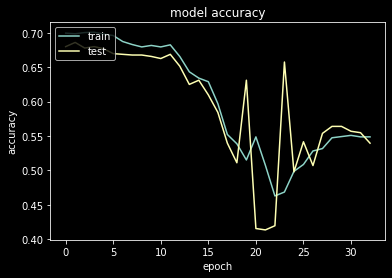

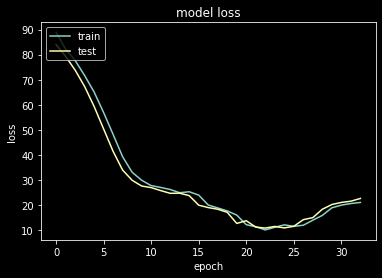

In [109]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()

# summarize history for loss

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()